In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from random import random
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.metrics import mean_squared_error, categorical_crossentropy, mse

from sklearn.metrics import confusion_matrix
import itertools

- Make the data
- Preprocess the data
- Make the neural network
- Compile the network
- Train the network
- Predict the values

In [3]:
# Make the data
N = 10000
train_sample = np.zeros((N,2))
train_sample[:, 0] = np.random.random((N))
train_sample[:, 1] = np.random.random((N))

def f(a):
    x = a[0]
    y = a[1]
    r2 = (x-0.5)**2 + (y-0.3)**2
    return np.exp(-r2)

train_label = np.array([f(i) for i in train_sample])

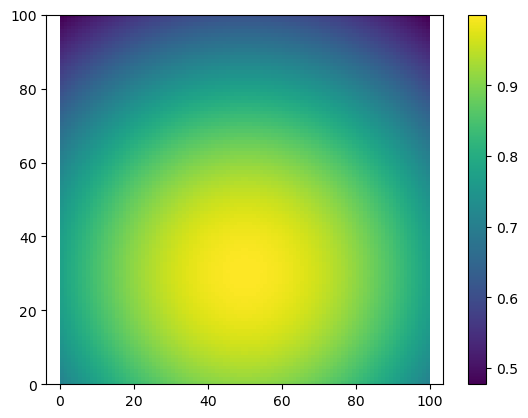

In [4]:
reals = np.zeros_like(train_sample)
x_r = np.linspace(0,1,100)
y_r = np.linspace(0,1,100)
x,y = np.meshgrid(x_r, y_r)
reals[:,0] = x.flatten()
reals[:,1] = y.flatten()
z = np.array([f(real) for real in reals])
plt.pcolormesh(z.reshape(100,100));
plt.axis("equal")
plt.colorbar();

In [5]:
#make a neural network

net = Sequential()
net.add(Dense(16, input_shape=(2,), activation='selu'))
net.add(Dense(16,activation='selu'))
net.add(Dense(16,activation='selu'))
net.add(Dense(1,activation='selu'))

In [6]:
net.compile(optimizer=RMSprop(learning_rate=1e-4), loss='mse')

In [7]:
net.fit(x=train_sample, y=train_label, batch_size=10,epochs=30,verbose=1)

Epoch 1/30
1000/1000 [==============================] - 1s 652us/step - loss: 0.0185
Epoch 2/30
1000/1000 [==============================] - 1s 635us/step - loss: 0.0029
Epoch 3/30
1000/1000 [==============================] - 1s 653us/step - loss: 0.0013
Epoch 4/30
1000/1000 [==============================] - 1s 627us/step - loss: 3.2792e-04
Epoch 5/30
1000/1000 [==============================] - 1s 623us/step - loss: 1.4796e-04
Epoch 6/30
1000/1000 [==============================] - 1s 619us/step - loss: 1.0852e-04
Epoch 7/30
1000/1000 [==============================] - 1s 608us/step - loss: 9.1280e-05
Epoch 8/30
1000/1000 [==============================] - 1s 633us/step - loss: 8.1576e-05
Epoch 9/30
1000/1000 [==============================] - 1s 635us/step - loss: 7.3974e-05
Epoch 10/30
1000/1000 [==============================] - 1s 615us/step - loss: 7.0127e-05
Epoch 11/30
1000/1000 [==============================] - 1s 620us/step - loss: 6.4674e-05
Epoch 12/30
1000/1000 [========

1000/1000 [==============================] - 1s 540us/step


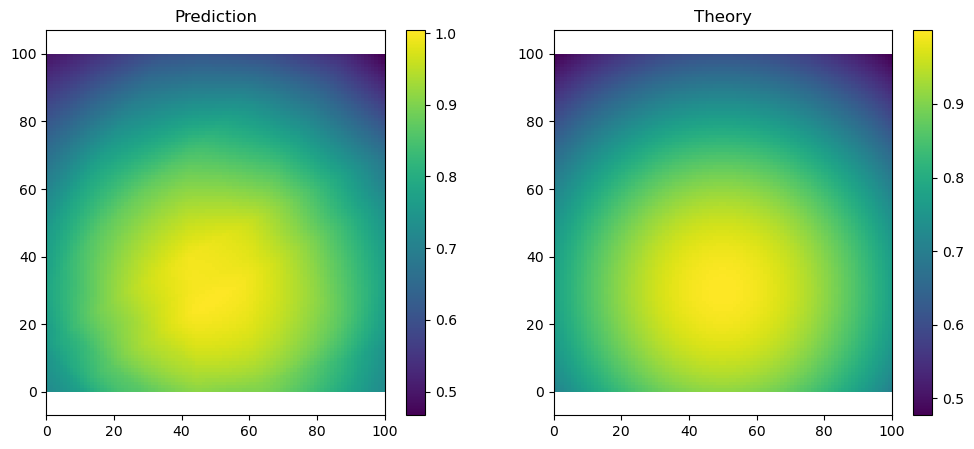

In [10]:
test_data = np.zeros_like(train_sample)

x_r = np.linspace(0,1,100)
y_r = np.linspace(0,1,100)
x,y = np.meshgrid(x_r, y_r)
test_data[:,0] = x.flatten()
test_data[:,1] = y.flatten()

fig = plt.figure(figsize=(12,5))

test_output = net.predict(test_data, batch_size=10)
plt.subplot(1,2,1)
plt.pcolormesh(test_output.reshape(100,100));
plt.title("Prediction")
plt.axis("equal")
plt.colorbar();
plt.subplot(1,2,2)
plt.pcolormesh(z.reshape(100,100));
plt.title("Theory")
plt.axis("equal")
plt.colorbar();